## ⚙️ 1. Setup: Install Libraries

First, let's install the specific version of the Google Agent Development Kit (ADK) that this notebook is built with. Pinning the version ensures our code will always work as expected.

In [ ]:
!pip install google-adk==1.8.0 -q

## 🔑 2. Authentication: Configure Your API Key

Next, we need to securely provide our Google API key. This code will create a secure input prompt for you to paste your key. It then sets the key as an environment variable, which is the standard way the ADK authenticates your requests.

In [ ]:
import os
from getpass import getpass

# Prompt the user for their API key securely
api_key = getpass('Enter your Google API Key: ')

# Set the API key as an environment variable for ADK to use
os.environ['GOOGLE_API_KEY'] = api_key

print("✅ API Key configured successfully! Let the fun begin.")

 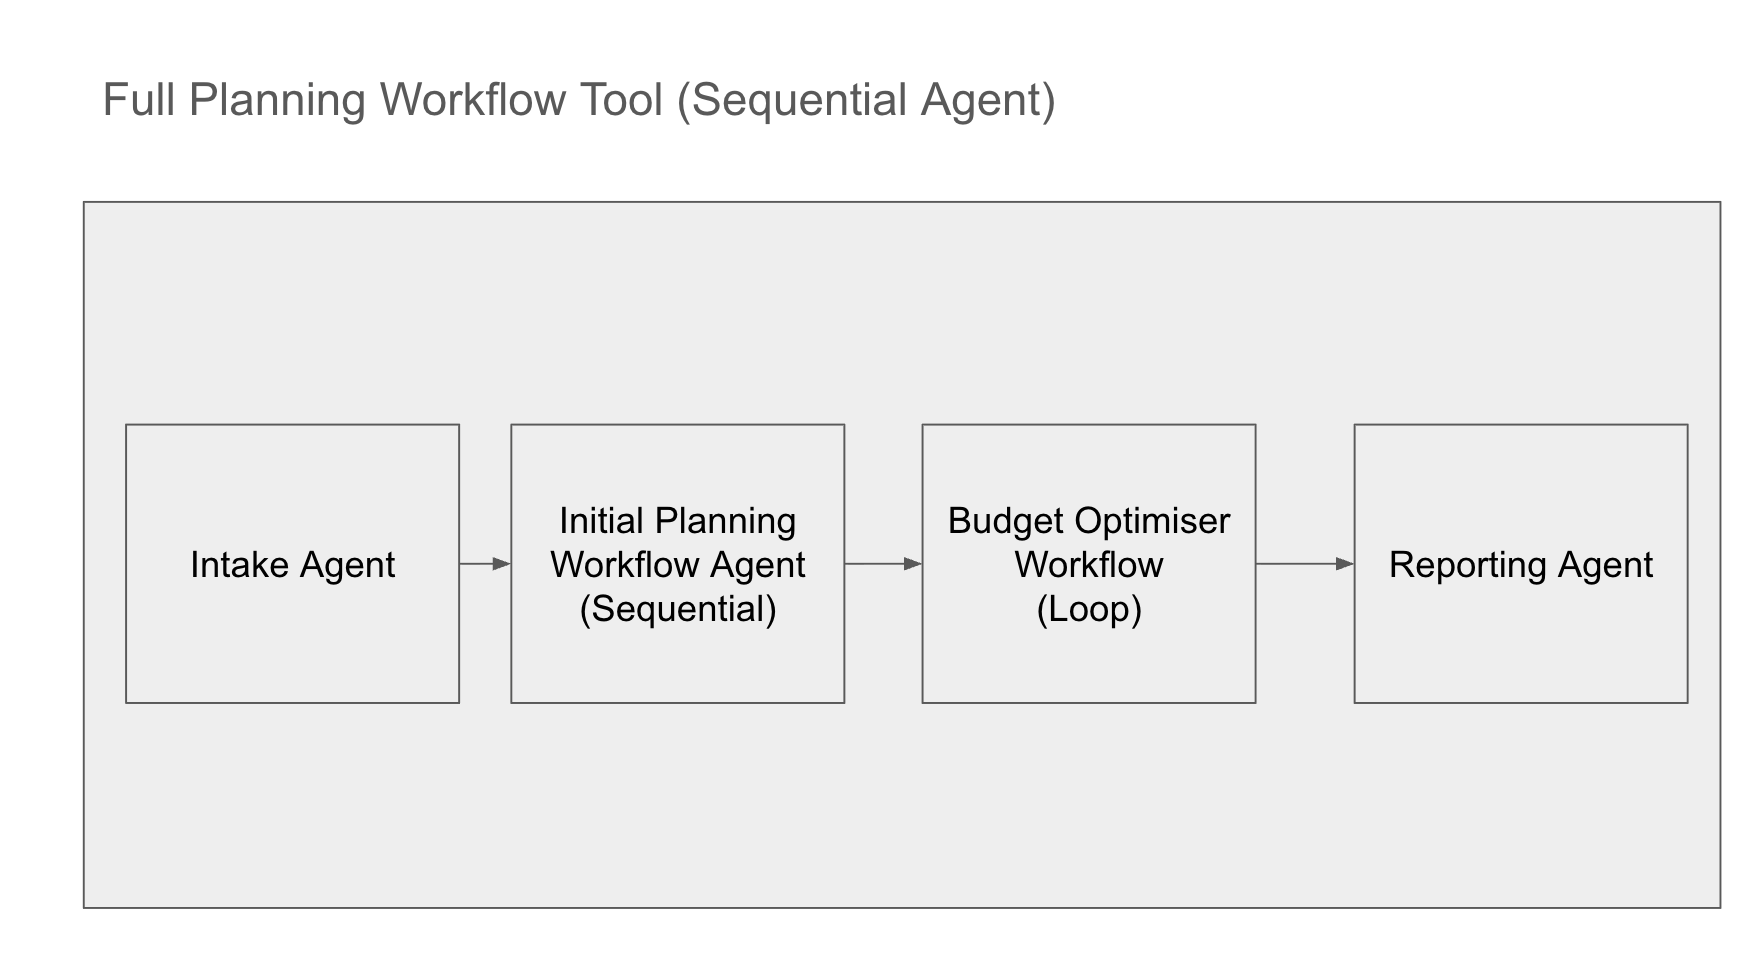

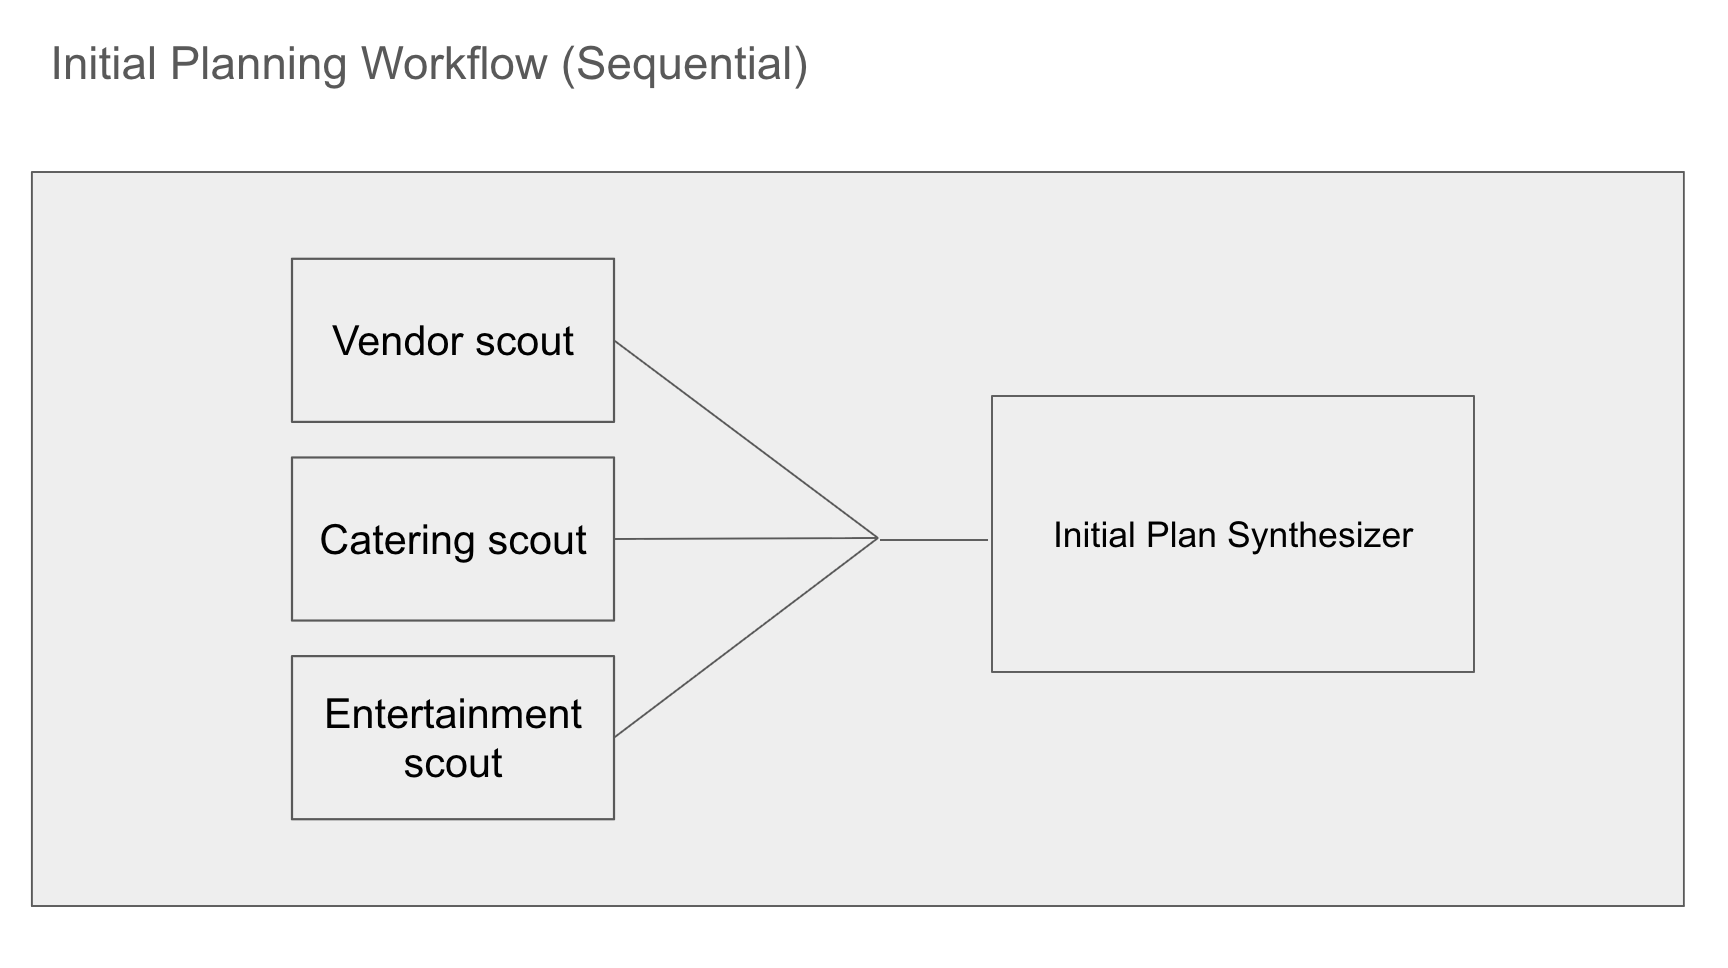

## 🛠️ 3. Define All Custom Tools

Here, we'll define all the custom Python functions that our various specialist agents will need throughout the entire workflow.

## 4. Create Tool Wrappers for Compatibility

To ensure our agents can reliably use both built-in tools and custom functions together, we'll wrap Google Search as a "tool agent."

In [ ]:
from google.adk.agents import Agent
from google.adk.tools import google_search
from google.adk.tools.agent_tool import AgentTool

google_search_agent = Agent(
    name="Google_Search_Agent",
    model="gemini-2.5-flash",
    instruction="You are just a wrapper for the Google Search tool.",
    tools=[google_search]
)

google_search_tool = AgentTool(agent=google_search_agent)

## 🧑‍🔬 5. Define All Specialist Agents

Now we define our complete team of specialist agents, ensuring they all use the consistent event_type variable.

In [ ]:
from google.adk.agents import SequentialAgent, LoopAgent, ParallelAgent

# --- Intake Agent ---


# --- Parallel Logistics Scouting Team ---


# --- Budget Optimizer Team (Instructions Updated) ---


# --- Final Reporting Agent ---


# --- Guest Management Agent ---


# --- Communication Agent ---


## 🔄 6. Assemble All Workflow Agents

Now we compose our specialists into the powerful, multi-step workflow agents.

In [ ]:
# --- Parallel Logistics Scout Workflow ---



# --- Budget Optimizer Workflow (no proposer) ---



# --- Full Autonomous Planning Workflow ---


## 👔 7. Build the Master Orchestrator

This is our final, user-facing "Genie." Its only job is to delegate tasks to its powerful team of tools.

In [ ]:
# --- Wrap all necessary agents/workflows as tools ---


# --- The Master Orchestrator ---

## 🚀 8. Build the Execution Engine

This is our standard helper function for running queries, which handles the Runner and streams the final response.

In [ ]:
from IPython.display import display, Markdown
from google.genai.types import Content, Part
from google.adk.runners import Runner
from google.adk.sessions import InMemorySessionService, Session

async def run_agent_query(agent: Agent, query: str, session: Session, user_id: str):
    """Initializes a runner and executes a query for a given agent and session."""
    print(f"\n🚀 Running query for agent: '{agent.name}' in session: '{session.id}'...")
    runner = Runner(agent=agent, session_service=session_service, app_name=agent.name)
    final_response = ""
    try:
        async for event in runner.run_async(
            user_id=user_id,
            session_id=session.id,
            new_message=Content(parts=[Part(text=query)], role="user")
        ):
            if event.is_final_response():
                final_response = event.content.parts[0].text
    except Exception as e:
        final_response = f"An error occurred: {e}"

    print("\n" + "-"*50)
    print("✅ Final Response:")
    display(Markdown(final_response))
    print("-"*50 + "\n")
    return final_response

## ✨ 9. Initialize Session and Run the Workflow

Finally, we set up our InMemorySessionService and define our main execution block. We set the initial budget and topic in the session state, then kick off the entire autonomous workflow with a single call.

In [ ]:
from google.adk.sessions import InMemorySessionService


# --- Initialize our Session Service ---
# This one service will manage all the different sessions in our notebook.
session_service = InMemorySessionService()
user_id = "adk_event_planner_001"

## ✨ 10. The Grand Finale: Run the Full Conversation

Finally, we initialize our SessionService and run a full, multi-turn conversation with our "Autonomous Event Genie."

In [ ]:
async def run_capstone_project():
    session = await session_service.create_session(
        app_name=master_orchestrator_agent.name,
        user_id=user_id
    )

    # --- The Conversation ---
    query1 = "I need to plan a 50-person AI tech meetup in Austin, Texas with a budget of $4000. Find some vendors."
    print(f"🗣️ User: {query1}")
    await run_agent_query(master_orchestrator_agent, query1, session, user_id)

    query2 = "This looks great. Please add 'Grace Hopper' to the guest list. Her email is grace@example.com."
    print(f"🗣️ User: {query2}")
    await run_agent_query(master_orchestrator_agent, query2, session, user_id)

    query3 = "Now, please draft an announcement email based on the final plan."
    print(f"🗣️ User: {query3}")
    await run_agent_query(master_orchestrator_agent, query3, session, user_id)

    query4 = "Perfect. Please send the email to the guest list."
    print(f"🗣️ User: {query4}")
    await run_agent_query(master_orchestrator_agent, query4, session, user_id)

# Run the full system
await run_capstone_project()